# HOUSE PRICES :

In [120]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

In [2]:
# Loading train_data
train=pd.read_csv('train.csv')
pd.set_option('display.max_columns', 82)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Loading test_data
test=pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print('The train data has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print('The test data has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

The train data has 1460 rows and 81 columns
The test data has 1459 rows and 80 columns


The train and test data contains approximately equal number of rows. Since SalePrice is our target variable, there is no SalePrice column in test data.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# Checking for the null values
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

Out of 81 features, 19 features have missing values. Let's check the percentage of missing values in these columns. 

In [8]:
# Missing values percentage
miss=train.isnull().sum()/len(train)
miss=miss[miss>0]
miss.sort_values(inplace=True)
miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

We can infer that the variable PoolQC has 99.5% missing values followed by MiscFeature, Alley, and Fence. 

## EDA :

Before performing the exploratory data analysis,lets check for the details of category and numerical variables.

In [9]:
# Numerical variables
num=train.select_dtypes(include=np.number)
print(num.columns)
print('No. of Numerical variables are {}'.format(len(num.columns)))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
No. of Numerical variables are 38


In [10]:
# Categorical variables
cat_data=train.select_dtypes(exclude=np.number)
print(cat_data.columns)
print('No. of Categorical variables are {}'.format(len(cat_data.columns)))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
No. of Categorical variables are 43


There are 38 numeric and 43 categorical columns in the train data. We should remove the Id variable from numeric data. 

In [11]:
num=num.drop('Id',axis=1)

### SalePrice:

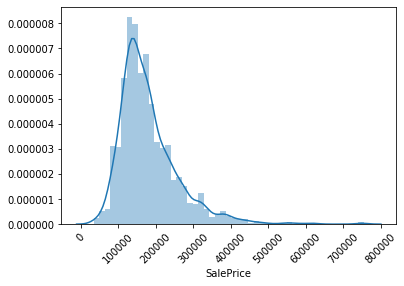

In [12]:
# Checking the distribution of target variable
sns.distplot(train['SalePrice'])
plt.xticks(rotation=45)
plt.show()

We see that the target variable SalePrice has a right-skewed distribution. We'll need to log transform this variable so that it becomes normally distributed.

Lets check for the correlation behavior of numerical variables.

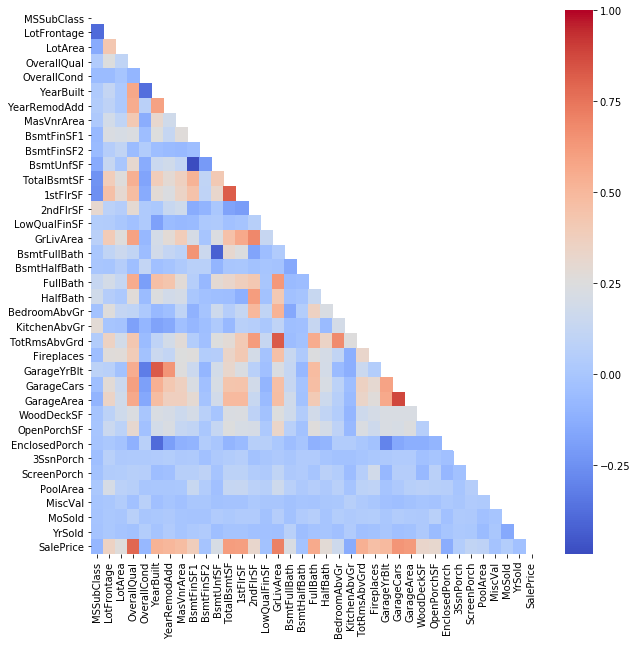

In [13]:
plt.figure(figsize=(10,10))
matrix=np.triu(num.corr())
sns.heatmap(num.corr(),mask=matrix,cmap='coolwarm')
plt.show()

From the last row, we can notice the correlation of all variables against SalePrice.Here a numeric correlation score will help us understand.

In [14]:
corr=num.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) #last 5 values

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

----------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


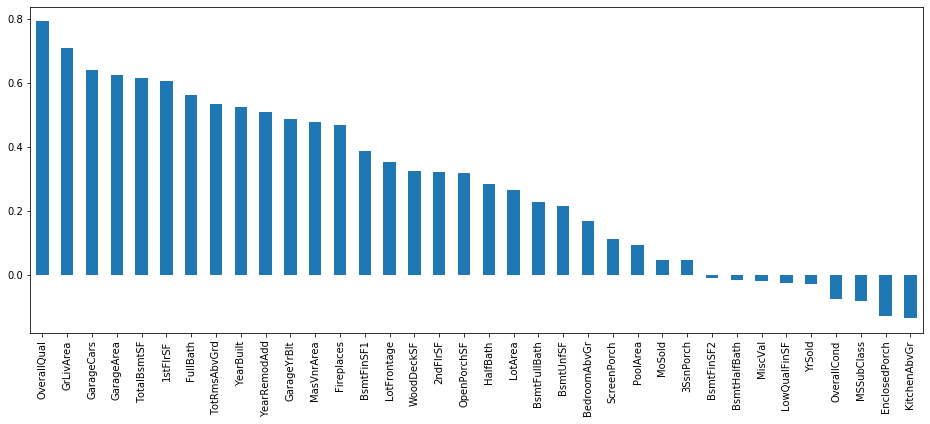

In [15]:
plt.figure(figsize=(16,6))
corr['SalePrice'].sort_values(ascending=False)[1:].plot(kind='bar')

**Inferences :**
* Here we see that the OverallQual feature is 79% correlated with the target variable. Overallqual feature refers to the overall material and quality of the materials of the completed house.
* GrLivArea is 70% correlated with the target variable. GrLivArea refers to the living area (in sq ft.) above ground.
* The following variables show people also care about if the house has a garage, the area of that garage, the size of the basement area, etc. 

Lets check for the details of OverallQual variable.

In [16]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [17]:
#let's check the mean price per quality and plot it.
pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median) # median because target is right skewed.
pivot.sort_values(by='SalePrice')

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


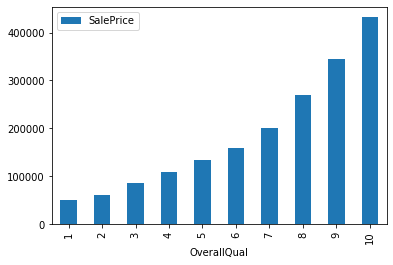

In [18]:
pivot.plot(kind='bar')
plt.show()

As the overall quality of a house increases, its sale price also increases.Let's visualize the next correlated variable GrLivArea and understand their behavior. 

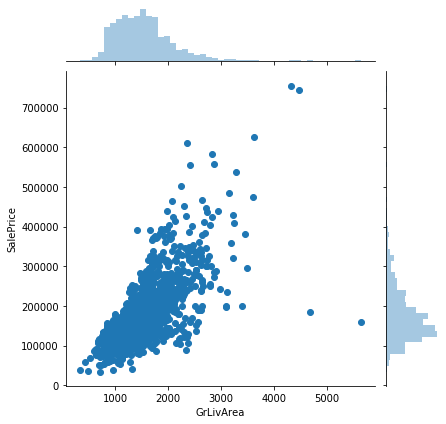

In [19]:
#GrLivArea variable
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.show()

Here, we see a direct correlation of living area with sale price.Outliers play a significant role in spoiling a model's performance. Hence, we'll get rid of it.

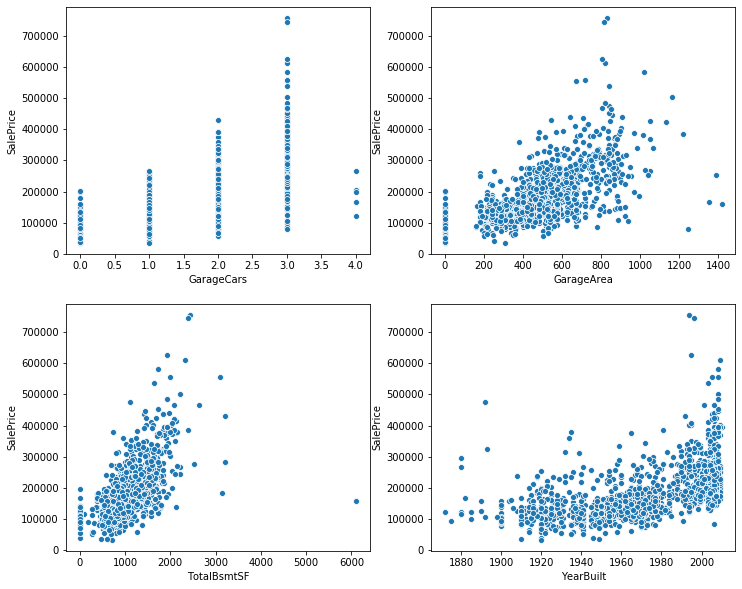

In [20]:
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize=(12,10))
sns.scatterplot(x='GarageCars',y='SalePrice', data=train, ax=ax[0,0])
sns.scatterplot(x='GarageArea', y='SalePrice', data=train, ax=ax[0,1])
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train, ax=ax[1,0])
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train, ax=ax[1,1])
plt.show()

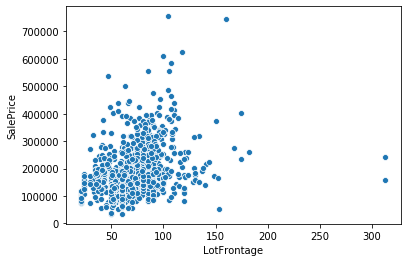

In [21]:
sns.scatterplot(x='LotFrontage', y='SalePrice', data=train)
plt.show()

From above plots we can infere that the features 'LotFronatge','GrLivArea' and 'TotalBsmtSF' consists outliers.

While using ANOVA, our hypothesis is as follows: 

* Ho - There exists no significant difference between the groups. 
* Ha - There exists a significant difference between the groups.

Now, we'll define a function which calculates p values. From those p values, we'll calculate a disparity score. Higher the disparity score, better the feature in predicting sale price. 

In [22]:
import scipy.stats as stats

In [23]:
cat = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

In [24]:
cat_data['SalePrice'] = train.SalePrice.values
k = anova(cat_data) 
k['disparity'] = np.log(1/k['pval'].values) 
print(k)

         features           pval   disparity
8    Neighborhood  1.558600e-225  517.637858
18      ExterQual  1.439551e-204  469.363028
30    KitchenQual  3.032213e-192  440.987045
20     Foundation   5.791895e-91  207.778784
27      HeatingQC   2.667062e-67  153.292224
42  SaleCondition   7.988268e-44   99.235770
15    Exterior1st   2.586089e-43   98.061012
16    Exterior2nd   4.842186e-43   97.433793
41       SaleType   5.039767e-42   95.091214
0        MSZoning   8.817634e-35   78.413725
12     HouseStyle   3.376777e-25   56.347706
3        LotShape   6.447524e-25   55.700931
28     CentralAir   1.809506e-22   50.063818
37     PavedDrive   1.803569e-18   40.856764
13      RoofStyle   3.653523e-17   37.848255
11       BldgType   2.056736e-10   22.304730
4     LandContour   2.742217e-08   17.411914
14       RoofMatl   7.231445e-08   16.442242
9      Condition1   8.904549e-08   16.234118
19      ExterCond   5.106681e-07   14.487546
6       LotConfig   3.163167e-06   12.663937
31     Fun

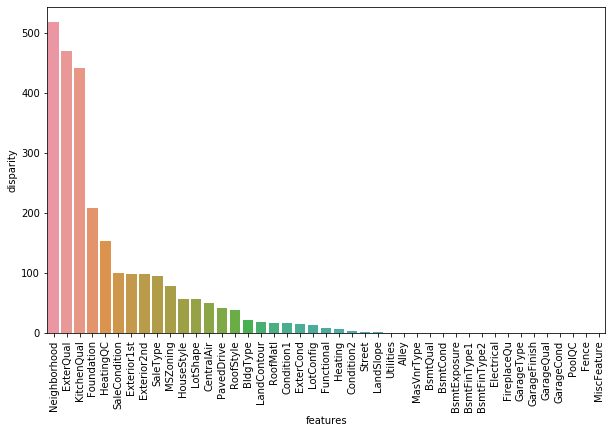

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt.show()

From the above hypothesis testing we can conclude that above features having diparity factor greater than 1 are statistically important.

## Data Pre-Processing :

In [26]:
#dropping id column from both train and test datsets.
train=train.drop('Id',axis=1)
test=test.drop('Id',axis=1)

In [27]:
#dropping outliers from GrLivArea
train=train[train['GrLivArea']<4000]
train.reset_index(drop=True,inplace=True)

In [28]:
#dropping outliers from TotalBsmtSF
train.drop(train[train['TotalBsmtSF']>4000].index,inplace=True)

In [29]:
#dropping outliers from LotFrontage
train.drop(train[train['LotFrontage']>250].index,inplace=True)
train.reset_index(drop=True,inplace=True)

In [30]:
#Now combining test and tarin datasets
train['DataType']='train'
test['DataType']='test'
test['SalePrice']=np.nan

In [31]:
data=pd.concat([train,test],sort=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2914 entries, 0 to 1458
Data columns (total 81 columns):
MSSubClass       2914 non-null int64
MSZoning         2910 non-null object
LotFrontage      2428 non-null float64
LotArea          2914 non-null int64
Street           2914 non-null object
Alley            198 non-null object
LotShape         2914 non-null object
LandContour      2914 non-null object
Utilities        2912 non-null object
LotConfig        2914 non-null object
LandSlope        2914 non-null object
Neighborhood     2914 non-null object
Condition1       2914 non-null object
Condition2       2914 non-null object
BldgType         2914 non-null object
HouseStyle       2914 non-null object
OverallQual      2914 non-null int64
OverallCond      2914 non-null int64
YearBuilt        2914 non-null int64
YearRemodAdd     2914 non-null int64
RoofStyle        2914 non-null object
RoofMatl         2914 non-null object
Exterior1st      2913 non-null object
Exterior2nd      2913 non

In [32]:
print(data.columns[data.isnull().any()])

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')


In [33]:
# Missing values percentage
miss=data.isnull().sum()/len(data)
miss=miss[miss>0]
miss.sort_values(inplace=True)
miss

Electrical      0.000343
GarageArea      0.000343
GarageCars      0.000343
Exterior1st     0.000343
Exterior2nd     0.000343
KitchenQual     0.000343
SaleType        0.000343
TotalBsmtSF     0.000343
BsmtFinSF1      0.000343
BsmtUnfSF       0.000343
BsmtFinSF2      0.000343
Utilities       0.000686
Functional      0.000686
BsmtHalfBath    0.000686
BsmtFullBath    0.000686
MSZoning        0.001373
MasVnrArea      0.007893
MasVnrType      0.008236
BsmtFinType1    0.027111
BsmtFinType2    0.027454
BsmtQual        0.027797
BsmtExposure    0.028140
BsmtCond        0.028140
GarageType      0.053878
GarageCond      0.054564
GarageQual      0.054564
GarageFinish    0.054564
GarageYrBlt     0.054564
LotFrontage     0.166781
FireplaceQu     0.487303
SalePrice       0.500686
Fence           0.804393
Alley           0.932052
MiscFeature     0.963967
PoolQC          0.997255
dtype: float64

In [34]:
miss_col=data[['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType']]
for i in miss_col.columns:
    print(miss_col[i].value_counts())

RL         2260
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
138.0      1
182.0      1
119.0      1
195.0      1
137.0      1
Name: LotFrontage, Length: 127, dtype: int64
Grvl    120
Pave     78
Name: Alley, dtype: int64
AllPub    2911
NoSeWa       1
Name: Utilities, dtype: int64
VinylSd    1025
MetalSd     450
HdBoard     441
Wd Sdng     409
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64
VinylSd    1014
MetalSd     447
HdBoard     405
Wd Sdng     390
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      14
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64
None       1740
BrkFace     878
S

In [35]:
data['MSSubClass'] = data['MSSubClass'].apply(str)
data.groupby('MSSubClass')['MSZoning']

In [36]:
data['MSZoning'] = data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [37]:
# imputing LotFrontage by the median of neighborhood
data['LotFrontage']=data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median))

In [38]:
data=data.drop(['Alley','Utilities'],axis=1)

In [39]:
data['Exterior1st']=data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd']=data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

In [40]:
data['MasVnrArea']=data['MasVnrArea'].fillna(0)

In [41]:
data['MasVnrType']=data.groupby('MasVnrArea')['MasVnrType'].transform(lambda x:x.fillna(x.mode()[0]))

In [42]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')

In [43]:
for col in ('BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'):
    data[col] = data[col].fillna(0)

In [44]:
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])

In [45]:
for col in ('BsmtHalfBath','BsmtFullBath'):
    data[col] = data[col].fillna(0)

In [46]:
for col in ('KitchenQual', 'Functional', 'FireplaceQu'):
    data[col]=data[col].fillna(data[col].mode()[0])
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    data[col] = data[col].fillna('None')

In [47]:
data=data.drop(['PoolQC', 'Fence', 'MiscFeature'],axis=1)

In [48]:
data['SaleType']=data['SaleType'].fillna(data['SaleType'].mode()[0])

In [49]:
data.columns[data.isnull().any()]

Index(['SalePrice'], dtype='object')

## Featutre Engineering :

In [50]:
data['haspool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [51]:
data['Total_sqr_footage'] = (data['BsmtFinSF1'] + data['BsmtFinSF2'] +
                                 data['1stFlrSF'] + data['2ndFlrSF'])

data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) +
                               data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))

data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] +
                              data['EnclosedPorch'] + data['ScreenPorch'] +
                              data['WoodDeckSF'])

From the Statistical Analysis, we select those columns which are significant in predecting our target .

In [52]:
data=data[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt',
           'YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','YrSold','OverallCond','MSSubClass',
           'EnclosedPorch','KitchenAbvGr','Neighborhood','ExterQual','KitchenQual','Foundation','HeatingQC','SaleCondition',
           'Exterior1st','Exterior2nd','SaleType','MSZoning','HouseStyle','LotShape','CentralAir','PavedDrive','RoofStyle',
           'haspool','has2ndfloor','hasgarage','hasbsmt','hasfireplace','Total_sqr_footage','Total_Bathrooms','Total_porch_sf','DataType']]

In [53]:
cat_cols=data.select_dtypes(['object']).columns
cat_cols

Index(['MSSubClass', 'Neighborhood', 'ExterQual', 'KitchenQual', 'Foundation',
       'HeatingQC', 'SaleCondition', 'Exterior1st', 'Exterior2nd', 'SaleType',
       'MSZoning', 'HouseStyle', 'LotShape', 'CentralAir', 'PavedDrive',
       'RoofStyle', 'DataType'],
      dtype='object')

In [54]:
cat_cols=cat_cols[:-1]
cat_cols

Index(['MSSubClass', 'Neighborhood', 'ExterQual', 'KitchenQual', 'Foundation',
       'HeatingQC', 'SaleCondition', 'Exterior1st', 'Exterior2nd', 'SaleType',
       'MSZoning', 'HouseStyle', 'LotShape', 'CentralAir', 'PavedDrive',
       'RoofStyle'],
      dtype='object')

In [55]:
# Doing dummification
for col in cat_cols:
    freqs=data[col].value_counts()
    k=freqs.index[freqs>20][:-1]
    for cat in k:
        name=col+'_'+cat
        data[name]=(data[col]==cat).astype(int)
    del data[col]
    print(col)

MSSubClass
Neighborhood
ExterQual
KitchenQual
Foundation
HeatingQC
SaleCondition
Exterior1st
Exterior2nd
SaleType
MSZoning
HouseStyle
LotShape
CentralAir
PavedDrive
RoofStyle


In [56]:
data.shape

(2914, 116)

In [57]:
data_train=data[data['DataType']=='train']
del data_train['DataType']
data_test=data[data['DataType']=='test']
data_test.drop(['SalePrice','DataType'],axis=1,inplace=True)

In [58]:
print('Train Shape',data_train.shape)
print('Test Shape',data_test.shape)

Train Shape (1455, 115)
Test Shape (1459, 114)


In [59]:
del data

**Transforming Target variable**

In [60]:
data_train['SalePrice']=np.log(data_train['SalePrice'])

## Model Building :

In [61]:
X=data_train.drop('SalePrice',axis=1)
y=data_train['SalePrice']

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=1)

In [63]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### Decision Tree :

In [64]:
dt=DecisionTreeRegressor()
parameters = {'max_depth':range(1,10)},{'min_samples_split': (0.1,0.2,0.3,0.4,0.5)},
{'min_samples_leaf': range(1,10)},{'min_weight_fraction_leaf': (0.0,0.1,0.2)}
grid_obj = GridSearchCV(dt, param_grid = parameters)
grid_fit = grid_obj.fit(X_train,y_train)

best_dt = grid_fit.best_estimator_
best_dt

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [65]:
dt1=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
dt1.fit(X_train,y_train)
print('Decision Tree Training Score :',dt1.score(X_train,y_train))
print('Decision Tree Testing Score :',dt1.score(X_test,y_test))

Decision Tree Training Score : 0.8972991947714747
Decision Tree Testing Score : 0.8235902037956941


In [66]:
y_pred=np.floor(np.exp(dt1.predict(data_test)))

In [67]:
#sub = pd.DataFrame({'Id':np.arange(1461,2920), 'SalePrice':y_pred})
#sub.to_csv('submission.csv',index=False)

### KNN Regressor :

In [68]:
score = []
for k in range(1,100):   # running for different K values to know which yields the max accuracy. 
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test ))

In [69]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 7, Max Accuracy = 79.9205016368983


In [70]:
knn=KNeighborsRegressor(n_neighbors=7,weights='distance')
knn.fit(X_train,y_train)
print('KNN Training Score :',knn.score(X_train,y_train))
print('KNN Testing Score :',knn.score(X_test,y_test))

KNN Training Score : 0.9999905996685368
KNN Testing Score : 0.7718700419553416


We can say that it is overfit model.

### Random Forest Regressor :

In [73]:
rfg=RandomForestRegressor(random_state=1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'bootstrap': [True, False], 'criterio

In [74]:
estimators = np.arange(10, 200, 2)
scores = []
for n in estimators:
    rfg.set_params(n_estimators=n)
    rfg.fit((X_train), y_train)
    scores.append(rfg.score((X_test), y_test))
print(scores)

[0.8775847414312172, 0.880283356828376, 0.8803572811882654, 0.8795032832206953, 0.879722413027376, 0.8803225031653596, 0.8800111767660103, 0.8813215404478255, 0.8830461205484235, 0.8824481843031771, 0.8838820188462839, 0.8852767966038838, 0.8867290600558837, 0.8865803027139164, 0.8864211049793713, 0.8867146077580303, 0.8867000056097151, 0.8862532760615556, 0.8870518815987706, 0.8874845888105684, 0.8874045475120862, 0.887011898378073, 0.8865393226561304, 0.8870792176878582, 0.8868962131408211, 0.8866741969882883, 0.8869612075370306, 0.8874715959381865, 0.8866154011537208, 0.886446774155252, 0.8864548130724927, 0.886063298237673, 0.8862574300131004, 0.886243031377857, 0.8866043078789214, 0.8864844783766748, 0.8861821463102305, 0.8862363347354353, 0.886450389337573, 0.886229353940327, 0.886389248072687, 0.8857660886435104, 0.8858616177745318, 0.8859021690581301, 0.8858815002349292, 0.8859262183049679, 0.8857514942680045, 0.8855283869971318, 0.8853168643422478, 0.8854826827799414, 0.885459

In [75]:
estimators[scores.index(max(scores))]

48

In [78]:
param_dist = {'n_estimators': [48],'max_depth': [2, 3, 4,10],'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['mse', 'mae']}

cv_rf = GridSearchCV(rfg, cv = 5 ,param_grid=param_dist, n_jobs = 3)
cv_rf.fit(X_train,y_train)
print('RF Training Score :',cv_rf.score(X_train,y_train))
print('RF Testing Score :',cv_rf.score(X_test,y_test))

RF Training Score : 0.9831346646791409
RF Testing Score : 0.8832809356703204


In [79]:
y_pred=np.floor(np.exp(cv_rf.predict(data_test)))

In [ ]:
#sub = pd.DataFrame({'Id':np.arange(1461,2920), 'SalePrice':y_pred})
#sub.to_csv('submission.csv',index=False)

### Gradient Boosting Regressor :

In [80]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingRegressor(n_estimators=100, learning_rate = learning_rate, max_depth = 2, random_state = 1)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.908
Accuracy score (validation): 0.879

Learning rate:  0.1
Accuracy score (training): 0.933
Accuracy score (validation): 0.900

Learning rate:  0.25
Accuracy score (training): 0.952
Accuracy score (validation): 0.898

Learning rate:  0.5
Accuracy score (training): 0.966
Accuracy score (validation): 0.886

Learning rate:  0.75
Accuracy score (training): 0.972
Accuracy score (validation): 0.867

Learning rate:  1
Accuracy score (training): 0.975
Accuracy score (validation): 0.854



In [85]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate = 0.1, max_depth = 2, random_state = 1)
gb.fit(X_train, y_train)
print('RF Training Score :',gb.score(X_train,y_train))
print('RF Testing Score :',gb.score(X_test,y_test))

RF Training Score : 0.9325630977810675
RF Testing Score : 0.9000751953712738


In [86]:
y_pred=np.floor(np.exp(gb.predict(data_test)))

In [ ]:
#sub = pd.DataFrame({'Id':np.arange(1461,2920), 'SalePrice':y_pred})
#sub.to_csv('submission.csv',index=False)

### XG Boost :

In [87]:
from xgboost import XGBRegressor

In [88]:
xgb=XGBRegressor(max_depth=5)
xgb.fit(X_train,y_train)
print('XGB Training Score :',xgb.score(X_train,y_train))
print('XGB Testing Score :',xgb.score(X_test,y_test))

[12:27:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB Training Score : 0.9779285140139852
XGB Testing Score : 0.8995239046268891


In [89]:
y_pred=np.floor(np.exp(xgb.predict(data_test)))

In [ ]:
#sub = pd.DataFrame({'Id':np.arange(1461,2920), 'SalePrice':y_pred})
#sub.to_csv('submission.csv',index=False)

### Lasso :

In [90]:
lambdas=np.linspace(0.001,2,100)
params={'alpha':lambdas}
ls=Lasso(fit_intercept=True)

In [91]:
grid_search=GridSearchCV(ls,param_grid=params,cv=10,scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)

lasso=grid_search.best_estimator_
lasso

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [93]:
print('Lasso Training Score :',lasso.score(X_train,y_train))
print('Lasso Testing Score :',lasso.score(X_test,y_test))

Lasso Training Score : 0.9225692861608412
Lasso Testing Score : 0.9122831147855035


In [95]:
y_pred=np.floor(np.exp(lasso.predict(data_test)))

In [96]:
#sub = pd.DataFrame({'Id':np.arange(1461,2920), 'SalePrice':y_pred})
#sub.to_csv('submission.csv',index=False)

### Ridge :

In [97]:
rg=Ridge(fit_intercept=True)
grid_search=GridSearchCV(rg,param_grid=params,cv=10,scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)

ridge=grid_search.best_estimator_
ridge

Ridge(alpha=0.4856060606060606, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [98]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.4856060606060606, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [99]:
print('Ridge Training Score :',ridge.score(X_train,y_train))
print('Ridge Testing Score :',ridge.score(X_test,y_test))

Ridge Training Score : 0.9352225000543335
Ridge Testing Score : 0.9061279815468084


In [100]:
y_pred=np.floor(np.exp(ridge.predict(data_test)))

In [102]:
#sub = pd.DataFrame({'Id':np.arange(1461,2920), 'SalePrice':y_pred})
#sub.to_csv('submission.csv',index=False)

### RidgeCV :

In [101]:
rcv=RidgeCV(alphas=np.arange(0.001,1,0.001),store_cv_values=True)
rcv.fit(X_train,y_train)
print('RidgeCV Training Score :',rcv.score(X_train,y_train))
print('RidgeCV Testing Score :',rcv.score(X_test,y_test))

RidgeCV Training Score : 0.9344572811100579
RidgeCV Testing Score : 0.9078345267933017


### Lightgbm : 

In [103]:
lightgbm = LGBMRegressor(objective='regression', num_leaves=6,learning_rate=0.01, n_estimators=7000,max_bin=200, 
                         bagging_fraction=0.8,bagging_freq=4, bagging_seed=8,feature_fraction=0.2,feature_fraction_seed=8,
                         min_sum_hessian_in_leaf = 11,verbose=-1,random_state=42)
lightgbm.fit(X_train,y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2, feature_fraction_seed=8,
              importance_type='split', learning_rate=0.01, max_bin=200,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, min_sum_hessian_in_leaf=11, n_estimators=7000,
              n_jobs=-1, num_leaves=6, objective='regression', random_state=42,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [104]:
print('LGBM Training Score :',lightgbm.score(X_train,y_train))
print('LGBM Testing Score :',lightgbm.score(X_test,y_test))

LGBM Training Score : 0.9821565821341547
LGBM Testing Score : 0.9097325809224246


In [105]:
y_pred=np.floor(np.exp(lightgbm.predict(data_test)))

In [106]:
#sub = pd.DataFrame({'Id':np.arange(1461,2920), 'SalePrice':y_pred})
#sub.to_csv('submission.csv',index=False)

### Stacking :

In [138]:
from mlxtend.regressor import StackingCVRegressor

In [144]:
stregr = StackingCVRegressor(regressors=(ridge,lasso,lightgbm,xgb,gb), 
                           meta_regressor=lasso,use_features_in_secondary=True)


In [145]:
stregr.fit(X_train,y_train)

[13:49:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:49:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:49:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:49:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:49:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:49:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingCVRegressor(cv=5,
                    meta_regressor=Lasso(alpha=0.001, copy_X=True,
                                         fit_intercept=True, max_iter=1000,
                                         normalize=False, positive=False,
                                         precompute=False, random_state=None,
                                         selection='cyclic', tol=0.0001,
                                         warm_start=False),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
                    refit=True,
                    regressors=(Ridge(alpha=0.4856060606060606, copy_X=True,
                                      fit_intercept...
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          m

In [147]:
print('StackGen Training Score :',stregr.score(np.array(X_train),np.array(y_train)))
print('StackGen Testing Score :',stregr.score(np.array(X_test),np.array(y_test)))

StackGen Training Score : 0.940549924438556
StackGen Testing Score : 0.915922301993094


In [152]:
y_pred=np.floor(np.exp(stregr.predict(np.array(data_test))))

In [151]:
#sub = pd.DataFrame({'Id':np.arange(1461,2920), 'SalePrice':y_pred})
#sub.to_csv('submission.csv',index=False)

### Blending Models :

In [177]:
def blended_predictions(data_test):
    return ((0.2 * ridge.predict(data_test)) + \
            (0.3 * lasso.predict(data_test)) + \
            (0.05 * lightgbm.predict(data_test)) + \
            (0.05 * xgb.predict(data_test)) + \
            (0.05 * gb.predict(data_test)) + \
            (0.05 * cv_rf.predict(data_test)) + \
            (0.3 * stregr.predict(np.array(data_test))))

In [178]:
np.exp(blended_predictions(X))

array([205130.6925245 , 191981.4747626 , 212960.29758528, ...,
       255342.01776461, 135435.19998447, 152670.91665445])

In [179]:
#sub = pd.DataFrame({'Id':np.arange(1461,2920), 'SalePrice':np.floor(np.exp(blended_predictions(data_test)))})
#sub.to_csv('submission.csv',index=False)

In [181]:
#submission = pd.read_csv("submission.csv")
#submission.shape

(1459, 2)

### Outlier Prdeictions :

In [182]:
q1 = submission['SalePrice'].quantile(0.0045)
q2 = submission['SalePrice'].quantile(0.99)

In [183]:
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("submission1.csv", index=False)

In [184]:
submission['SalePrice'].head()

0    116209.0
1    155808.0
2    176610.0
3    197883.0
4    192619.0
Name: SalePrice, dtype: float64

In [187]:
#ScAle Predictions

#submission['SalePrice'] *= 1.001619
#submission.to_csv("submission2.csv", index=False)